In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
%matplotlib inline 

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [54]:
data = pd.read_csv("data.csv")

In [55]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [56]:
data.diagnosis = data['diagnosis'].map({'M':1, 'B':0})

In [57]:
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [195]:
data.drop("id", axis=1, inplace=True)

In [196]:
data.drop('Unnamed: 32', axis=1, inplace=True)

In [197]:
data.diagnosis.unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

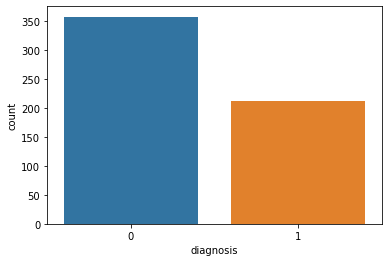

In [58]:
sns.countplot(x="diagnosis",data=data)

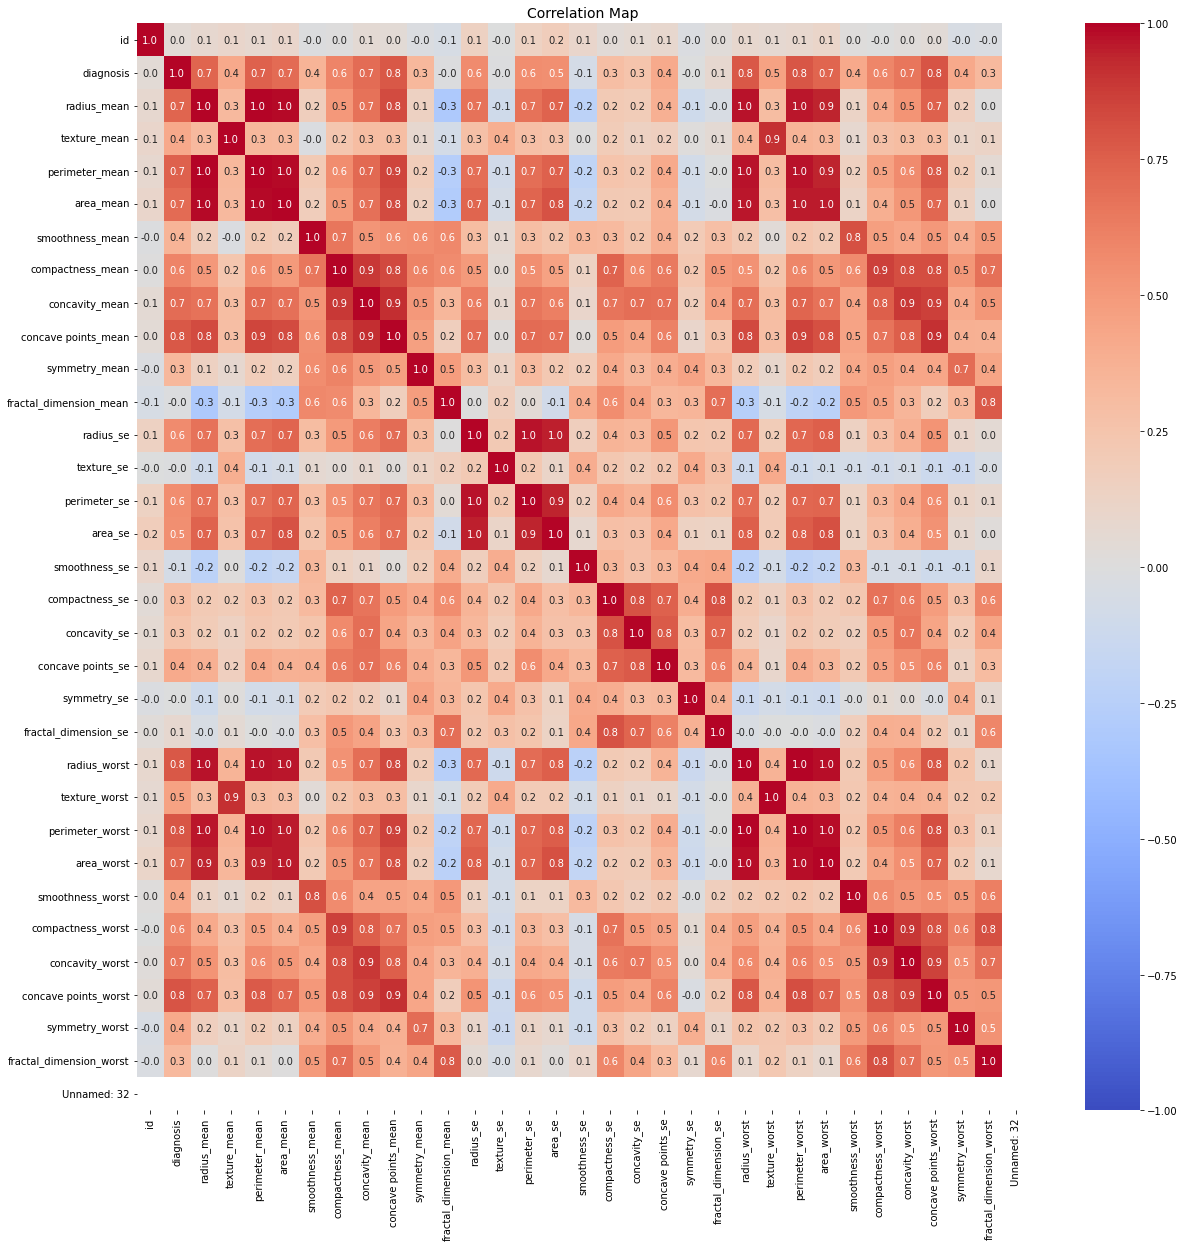

In [59]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(data.corr(), annot=True, fmt='.1f',
            ax=ax, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map', size=14);


In [60]:
flt = np.abs(data.corr()['diagnosis']) > .75


In [61]:
corr_feat = data.corr().columns[flt].tolist()

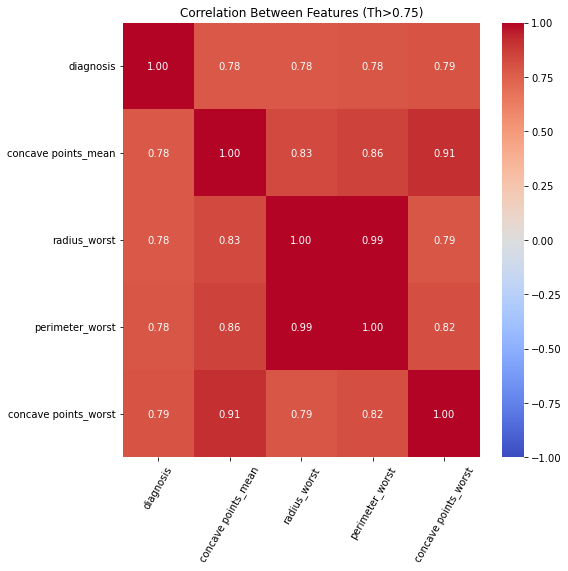

In [62]:
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(data[corr_feat].corr(), annot=True, fmt='.2f',
           ax=ax, cmap='coolwarm',vmin=-1,vmax=1)
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.title('Correlation Between Features (Th>0.75)');

In [255]:
def melt(dataset, param):
    data_melted = pd.melt(dataset, id_vars=param,
                     var_name="features",
                     value_name="value")
    return data_melted

def boxplot(dataset, param):
    plt.figure(figsize= (14,8))
    sns.boxplot(x="features", y="value", hue=param, data=dataset)
    plt.xticks(rotation = 90)
    return plt.show()

def pairplot(dataset, param):
    sns.pairplot(dataset, diag_kind='kde', markers='+', hue=param);

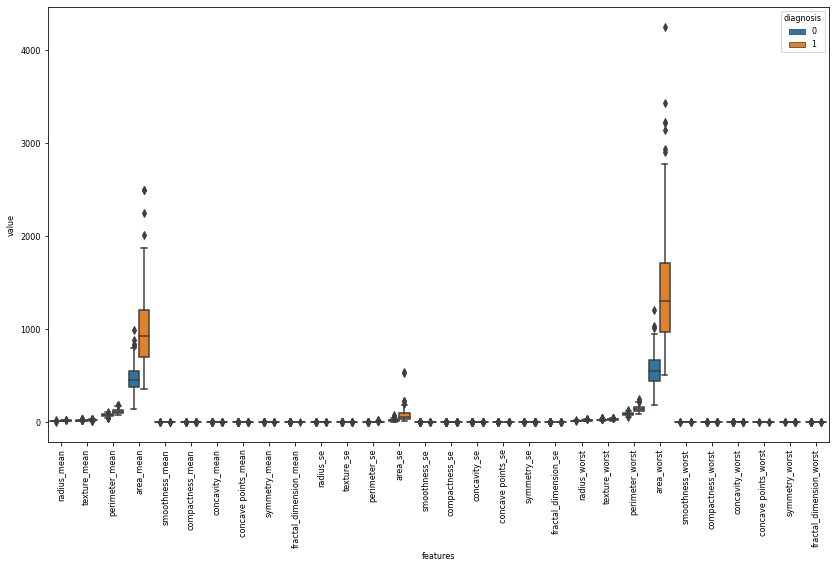

In [256]:
boxplot(melt(data,"diagnosis"),"diagnosis")


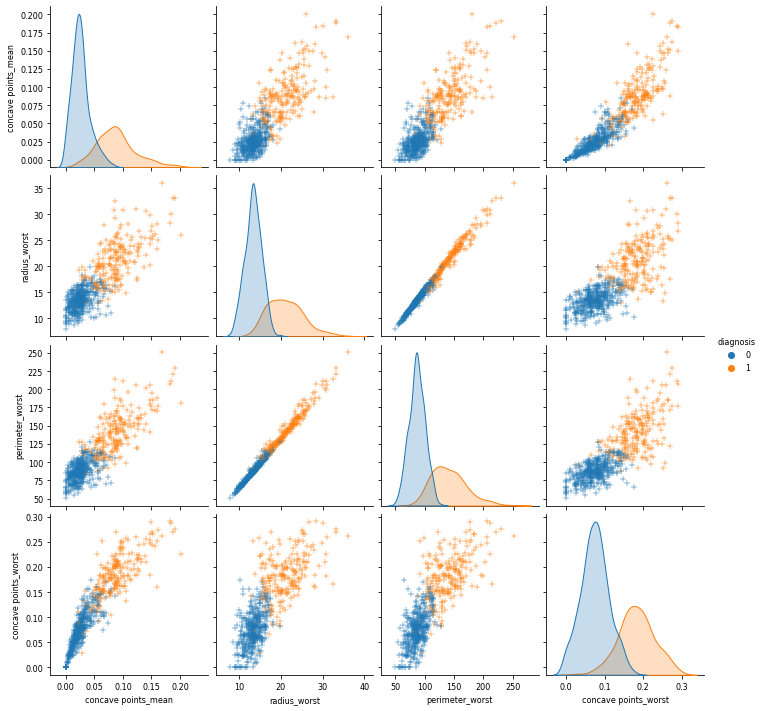

In [72]:
pairplot(data[corr_feat],"diagnosis")

In [73]:
feat = list(data.columns[1:11])
dataM = data[data.diagnosis ==1]
dataB = data[data.diagnosis ==0]

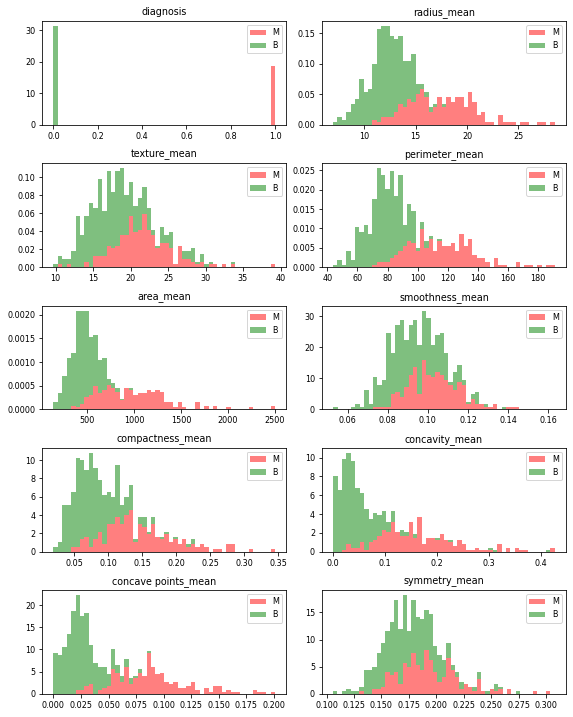

In [67]:
plt.rcParams.update({'font.size': 8})
f, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for i,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[feat[i]]) - min(data[feat[i]]))/50
    ax.hist([dataM[feat[i]],dataB[feat[i]]], 
            bins=np.arange(min(data[feat[i]]), max(data[feat[i]]) + binwidth, binwidth), 
            alpha=0.5,stacked=True, density=True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(feat[i])
plt.tight_layout()
plt.show()

In [216]:
X = data.drop(['diagnosis'], axis=1)
y = data.diagnosis

In [217]:
column = X.columns.tolist()

In [218]:
LOF = LocalOutlierFactor()
y_pred = LOF.fit_predict(X)
X_score =LOF.negative_outlier_factor_

In [219]:
outlier_score = pd.DataFrame()
outlier_score['score'] = X_score
outlier_score.head()

,score
0,-1.422440
1,-1.066782
2,-0.978948
3,-1.596933
4,-1.069936


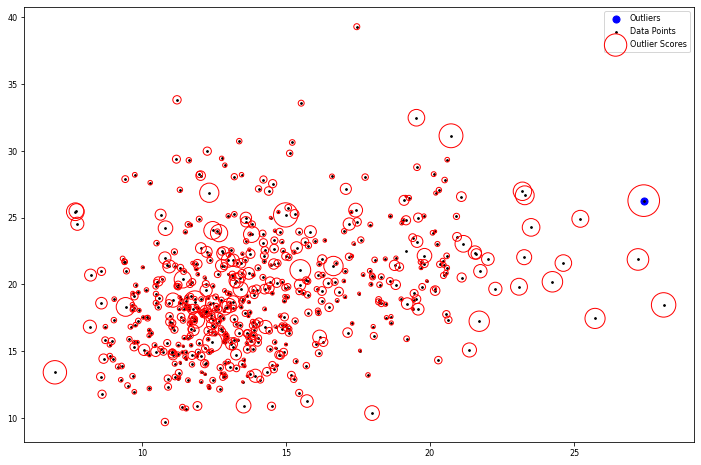

In [220]:
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())
outlier_score["radius"] = radius
filt = outlier_score["score"] < -2.5
outlier_index = outlier_score[filt].index.tolist()
plt.figure(figsize = (12,8))
plt.scatter(X.iloc[outlier_index,0], X.iloc[outlier_index,1], 
            color = "blue", s = 50, label = "Outliers" )
plt.scatter(X.iloc[:,0], X.iloc[:,1], color ="k", s=3, label = "Data Points" )
plt.scatter(X.iloc[:,0],X.iloc[:,1], s=1000*radius, edgecolor = "r", 
            facecolors = "none", label="Outlier Scores")
plt.legend()
plt.show()

In [221]:
X = X.drop(outlier_index)
y = y.drop(outlier_index).values


In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [223]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_df = pd.DataFrame(X_train, columns= column)

In [224]:
X_train_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.565282,-1.348842,-0.562444,-0.586448,0.972413,-0.251767,-0.611963,-0.513618,-0.544880,0.484423,...,-0.570059,-1.567822,-0.588713,-0.578466,0.859827,-0.559829,-0.495391,-0.577856,-0.154387,-0.176061
1,-0.705129,-0.076899,-0.709696,-0.686928,-0.766835,-0.498214,-0.396745,-0.864438,0.820497,-0.012254,...,-0.648128,0.203246,-0.603172,-0.630593,-0.331296,-0.362103,-0.028964,-0.687981,0.306712,-0.039923
2,-0.500953,-0.790095,-0.521878,-0.534086,-1.097108,-0.588022,-0.604006,-0.806566,-0.508372,-1.167283,...,-0.590603,-0.964300,-0.596680,-0.584140,-1.001302,-0.548160,-0.594345,-0.967298,-0.697177,-1.200619
3,2.550505,1.724263,2.507144,2.880252,-0.084319,1.243952,1.373371,1.937510,0.375106,0.048920,...,3.037569,1.392910,2.925276,3.666331,0.684662,1.056991,1.592092,2.222411,0.430156,0.190690
4,0.438818,0.867973,0.750660,0.342779,1.036199,3.986073,2.921827,2.296012,2.514439,2.663394,...,0.744794,0.939479,1.086836,0.620275,0.785381,1.735096,1.771601,2.024518,0.746027,1.078523


In [225]:
X_train_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,...,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02
mean,-2.290359e-16,-1.245156e-16,-7.504492e-16,1.697495e-16,-8.800685e-16,5.145618e-17,-2.908393e-17,4.446485e-17,-7.421995e-16,-4.860372e-16,...,1.661140e-16,-6.781589e-17,4.639446e-16,1.213695e-16,2.589588e-16,2.539251e-16,-1.191322e-16,-3.104150e-17,2.645519e-16,-9.452277e-17
std,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,...,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00
min,-1.988643e+00,-2.196046e+00,-1.943292e+00,-1.440387e+00,-3.093629e+00,-1.605785e+00,-1.089509e+00,-1.230110e+00,-2.724371e+00,-1.863505e+00,...,-1.704119e+00,-2.160284e+00,-1.666104e+00,-1.225088e+00,-2.242785e+00,-1.395338e+00,-1.301941e+00,-1.694669e+00,-2.360038e+00,-1.658912e+00
25%,-6.883473e-01,-7.605682e-01,-6.967153e-01,-6.787202e-01,-7.250196e-01,-7.337449e-01,-7.394015e-01,-7.264150e-01,-6.872584e-01,-6.618668e-01,...,-6.830539e-01,-7.257351e-01,-7.008487e-01,-6.525787e-01,-6.860051e-01,-6.894859e-01,-7.808163e-01,-7.405513e-01,-7.062538e-01,-6.830590e-01
50%,-2.268527e-01,-9.734092e-02,-2.318352e-01,-3.034063e-01,-3.470684e-02,-2.544482e-01,-3.602443e-01,-3.945446e-01,-9.218805e-02,-1.520809e-01,...,-2.701079e-01,-7.481641e-02,-2.989296e-01,-3.398173e-01,-5.541084e-02,-2.583771e-01,-1.846057e-01,-2.364519e-01,-1.126341e-01,-2.012940e-01
75%,4.723815e-01,5.727003e-01,4.910413e-01,3.685359e-01,6.393049e-01,4.914010e-01,5.094681e-01,5.667526e-01,5.247868e-01,4.465533e-01,...,4.777147e-01,6.629968e-01,5.320574e-01,3.082230e-01,5.926999e-01,4.910392e-01,5.771913e-01,7.147960e-01,5.681225e-01,4.887859e-01
max,3.921004e+00,4.520265e+00,3.926935e+00,5.226672e+00,4.757084e+00,3.986073e+00,4.301040e+00,3.922074e+00,4.504092e+00,4.805951e+00,...,3.473114e+00,3.767500e+00,3.612847e+00,4.531566e+00,3.947111e+00,4.462427e+00,4.515960e+00,2.701283e+00,4.175225e+00,3.818891e+00


In [114]:
df = X_train_df

In [115]:
df['diagnosis'] = y_train

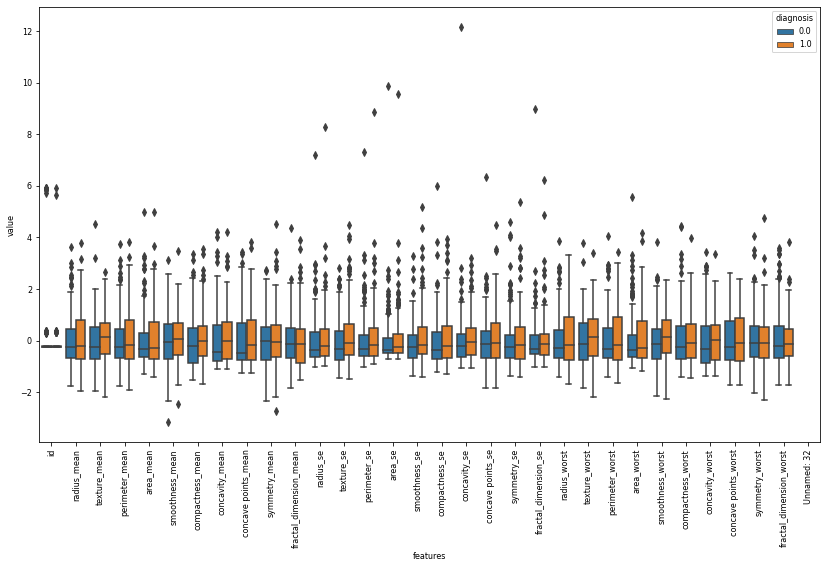

In [116]:
boxplot(melt(df,'diagnosis'),'diagnosis')

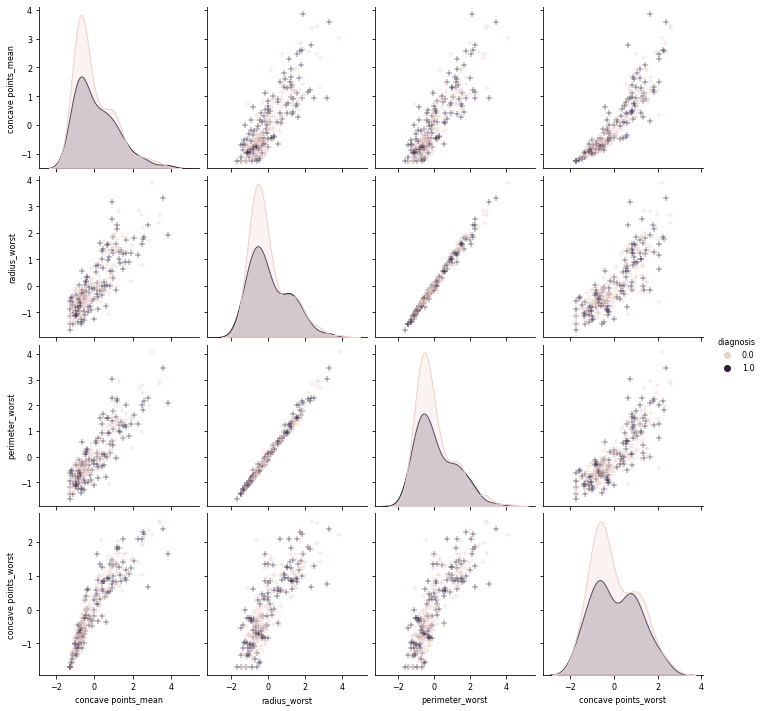

In [118]:
pairplot(df[corr_feat],'diagnosis')

In [231]:
def classification_and_fit_model(model, data, predictors, outcome):
    model.fit(data[predictors], data[outcome])
    predictions = model.predict(data[predictors])
    accuracy =metrics.accuracy_score(predictions, data[outcome])
    print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split(data):
        train_predictors = data[predictors].iloc[train,:]
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:],
                                data[outcome].iloc[test]))
        print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))
    model.fit(data[predictors],data[outcome])
        

In [232]:
predictor = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concave points_mean']


In [233]:
outcome = 'diagnosis'

In [234]:
model = LogisticRegression()

In [235]:
classification_and_fit_model(model, data, predictor, outcome)

Accuracy : 89.807%
Cross-Validation Score : 78.070%
Cross-Validation Score : 82.456%
Cross-Validation Score : 86.842%
Cross-Validation Score : 88.158%
Cross-Validation Score : 89.287%


In [239]:
predictor1 = ['radius_mean']

In [241]:
classification_and_fit_model(model, data, predictor1, outcome)

Accuracy : 95.782%
Cross-Validation Score : 75.439%
Cross-Validation Score : 76.316%
Cross-Validation Score : 81.287%
Cross-Validation Score : 81.579%
Cross-Validation Score : 81.723%


In [242]:
model = DecisionTreeClassifier()

In [243]:
classification_and_fit_model(model, data, predictor, outcome)

Accuracy : 100.000%
Cross-Validation Score : 84.211%
Cross-Validation Score : 85.526%
Cross-Validation Score : 87.427%
Cross-Validation Score : 88.816%
Cross-Validation Score : 88.929%


In [245]:
classification_and_fit_model(model, data, predictor1, outcome)

Accuracy : 95.782%
Cross-Validation Score : 75.439%
Cross-Validation Score : 76.316%
Cross-Validation Score : 81.287%
Cross-Validation Score : 81.579%
Cross-Validation Score : 81.723%


In [246]:
features_mean = list(X_train_df.columns[1:11])

In [247]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)

In [248]:
classification_and_fit_model(model, data, features_mean, outcome)

Accuracy : 96.485%
Cross-Validation Score : 85.965%
Cross-Validation Score : 89.035%
Cross-Validation Score : 91.813%
Cross-Validation Score : 92.544%
Cross-Validation Score : 92.973%


In [249]:
feature_importance = pd.Series(model.feature_importances_, index=features_mean).sort_values(ascending=False)
feature_importance

perimeter_mean            0.227562
concave points_mean       0.185979
area_mean                 0.182188
concavity_mean            0.146035
radius_se                 0.105488
compactness_mean          0.058124
texture_mean              0.048535
smoothness_mean           0.019651
symmetry_mean             0.013793
fractal_dimension_mean    0.012645
dtype: float64

In [250]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)


In [251]:
classification_and_fit_model(model, data, predictor, outcome)

Accuracy : 93.849%
Cross-Validation Score : 82.456%
Cross-Validation Score : 86.842%
Cross-Validation Score : 90.643%
Cross-Validation Score : 90.789%
Cross-Validation Score : 91.216%


In [253]:
model = RandomForestClassifier(n_estimators=100)


In [254]:
classification_and_fit_model(model, data, predictor1, outcome)

Accuracy : 95.782%
Cross-Validation Score : 75.439%
Cross-Validation Score : 76.316%
Cross-Validation Score : 80.994%
Cross-Validation Score : 81.360%
Cross-Validation Score : 81.371%
